<a href="https://colab.research.google.com/github/priyanka-ingale/unstructured-intelligence/blob/main/BertSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install transformers torch --quiet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
from sklearn.metrics import accuracy_score

In [5]:
# Load the dataset
df = pd.read_csv('IA2_2.csv')

In [6]:
# --- Step 1: Perform Sentiment Analysis using BERT ---
# Initialize the sentiment analysis pipeline with the specified multilingual model
# This model predicts star ratings from 1 to 5
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

In [9]:
# Define a function to get the sentiment label
def get_bert_sentiment(text):
    # Ensure text is a string and handle long reviews (BERT has a 512 token limit)
    try:
        # We truncate to 512 characters as a safe estimate for the token limit
        result = sentiment_pipeline(str(text)[:512])
        return result[0]['label']
    except:
        return None

# Add the 'bert_sentiment' column to the dataframe
# Note: This might take a few minutes for 1000 reviews depending on your hardware
df['bert_sentiment'] = df['review_text'].apply(get_bert_sentiment)

In [10]:
# --- Step 2: Extract the numeric part of the star rating ---
# The BERT model returns labels like '5 stars' or '1 star'
# We extract the first character and convert it to an integer
df['predicted_stars'] = df['bert_sentiment'].apply(lambda x: int(x.split(' ')[0]) if pd.notnull(x) else None)



In [11]:
# --- Step 3: Calculate Accuracy ---
# Compare 'predicted_stars' with the actual 'star_rating' from the dataset
# Drop rows where prediction might have failed if any
clean_df = df.dropna(subset=['predicted_stars'])
accuracy = accuracy_score(clean_df['star_rating'], clean_df['predicted_stars'])

print(f"Accuracy of the BERT model: {accuracy:.2%}")



Accuracy of the BERT model: 70.42%



Frequency of Predicted Star Levels:
predicted_stars
1     88
2     47
3     93
4    193
5    610
Name: count, dtype: int64


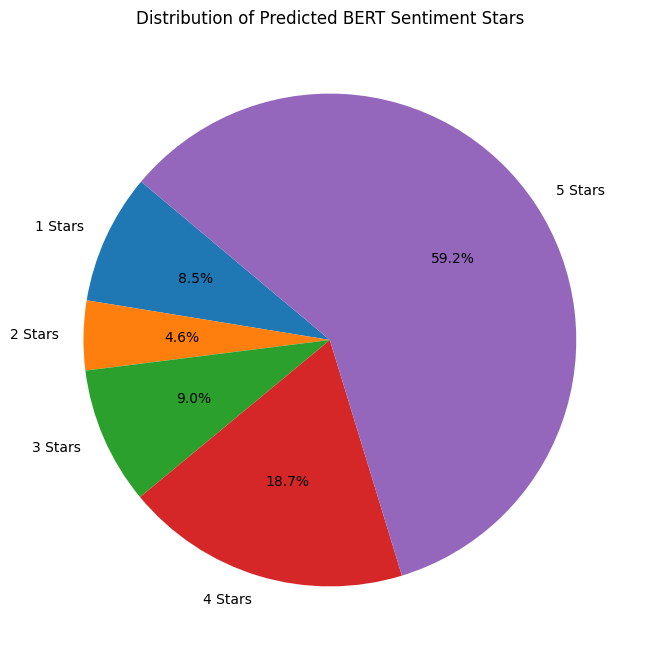

In [12]:
# --- Step 4: Distribution and Visualization ---
# Print the frequency of each predicted level of stars
star_counts = clean_df['predicted_stars'].value_counts().sort_index()
print("\nFrequency of Predicted Star Levels:")
print(star_counts)

# Visualize the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(star_counts, labels=[f'{int(i)} Stars' for i in star_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted BERT Sentiment Stars')
plt.show()